In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

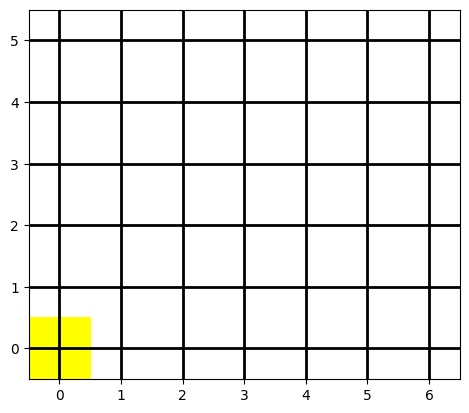

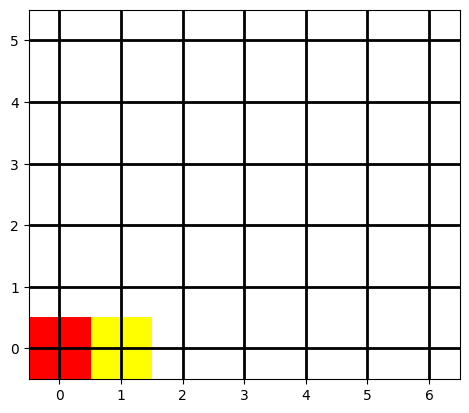

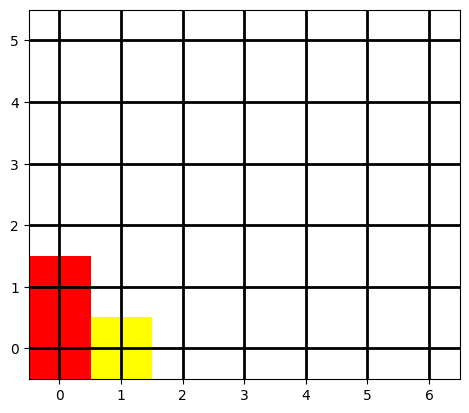

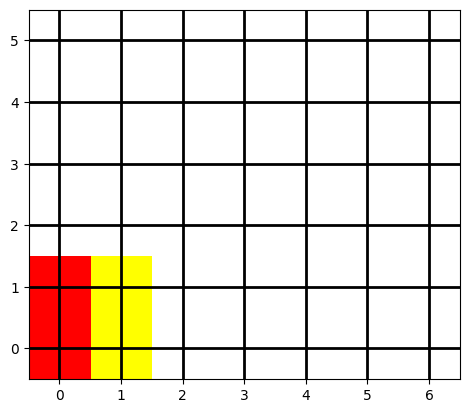

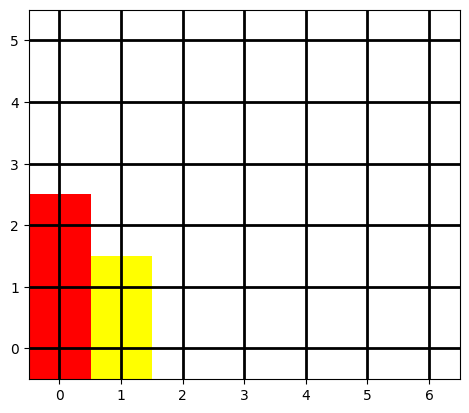

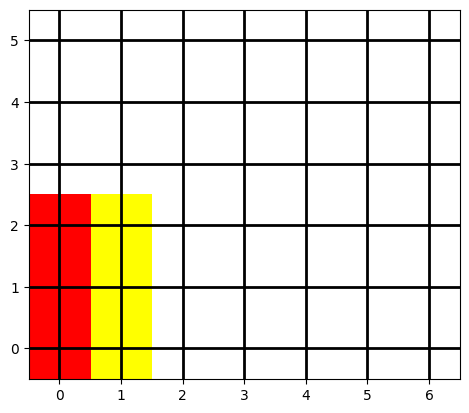

Player 1 wins!


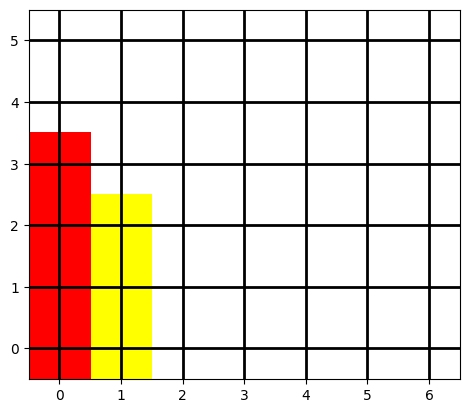

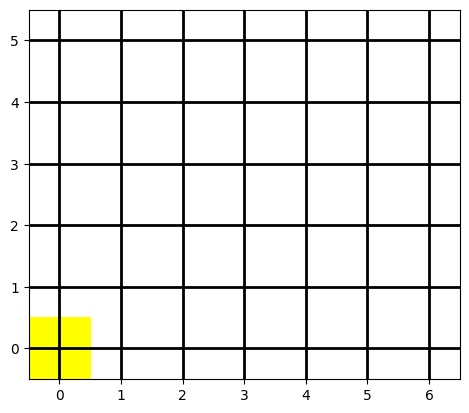

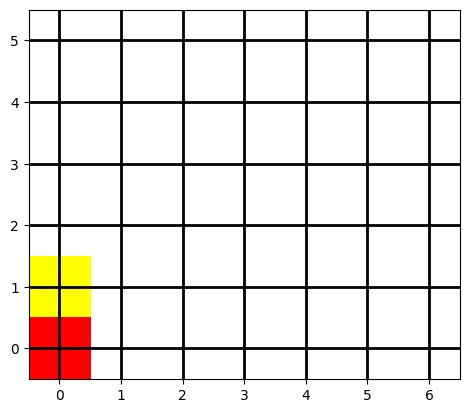

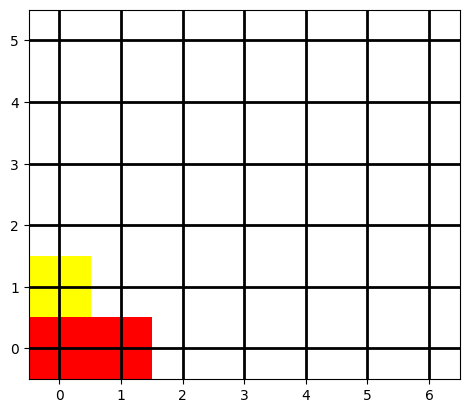

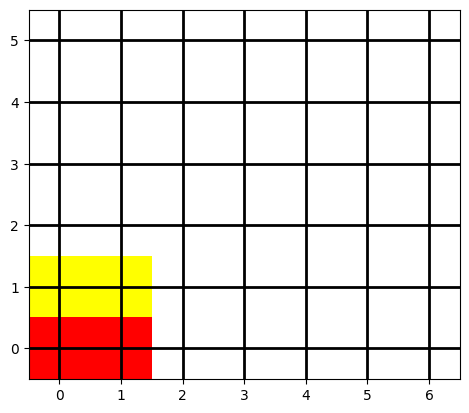

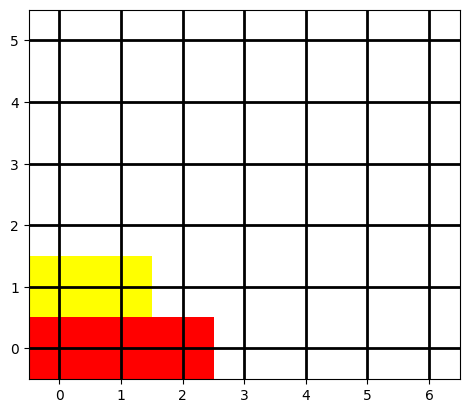

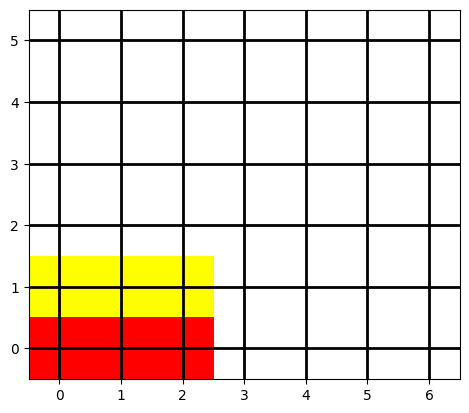

Player 1 wins!


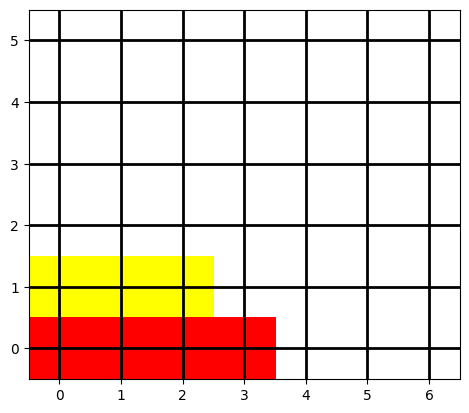

Game over! Player 1 has already won.


In [2]:
# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

class ConnectFour:
    def __init__(self):
        self.board = np.zeros((6, 7), dtype=int)
        self.winner = 0

    def drop_piece(self, player_number, column):
        if column < 0 or column >= self.board.shape[1]:
            raise ValueError("Column must be between 0 and 6")
        for row in range(self.board.shape[0]-1, -1, -1):
            if self.board[row][column] == 0:
                self.board[row][column] = player_number
                return row, True
        return None, False

    def check_winner(self, row, column):
        player_number = self.board[row][column]
        if player_number == 0:
            return False

        # Check vertical
        count = 0
        for r in range(row, self.board.shape[0]):
            if self.board[r][column] == player_number:
                count += 1
                if count == 4:
                    self.winner = player_number
                    return True
            else:
                break

        # Check horizontal
        count = 0
        for c in range(max(column-3, 0), min(column+4, self.board.shape[1])):
            if self.board[row][c] == player_number:
                count += 1
                if count == 4:
                    self.winner = player_number
                    return True
            else:
                count = 0

        return False

    def show_board(self):
        cmap = mcolors.ListedColormap(['white', 'red', 'yellow'])
        plt.imshow(self.board, cmap=cmap, extent=[0, 7, 0, 6])
        plt.grid(which='major', color='black', linewidth=2)
        plt.xticks(np.arange(7) + 0.5, range(7))
        plt.yticks(np.arange(6) + 0.5, range(6))
        plt.show()

    def play(self, player_number, column):
        if self.winner != 0:
            print(f"Game over! Player {self.winner} has already won.")
            return
        if player_number not in [1, 2]:
            raise ValueError("Player number must be 1 or 2")
        row, valid_move = self.drop_piece(player_number, column)
        if not valid_move:
            raise ValueError("Column is full")
        if self.check_winner(row, column):
            print(f"Player {player_number} wins!")
        self.show_board()

# Testing the implementation
game = ConnectFour()

# Scenario 1: Player one wins with vertical lines
game.play(1, 0)
game.play(2, 1)
game.play(1, 0)
game.play(2, 1)
game.play(1, 0)
game.play(2, 1)
game.play(1, 0)  # Player 1 should win here

# Resetting the game for the next scenario
game = ConnectFour()

# Scenario 2: Player two wins with horizontal lines
game.play(1, 0)
game.play(2, 0)
game.play(1, 1)
game.play(2, 1)
game.play(1, 2)
game.play(2, 2)
game.play(1, 3)  # Player 1 should win here
game.play(2, 3)  # This move should not happen, as the game should stop after player 1 wins
